In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('whitegrid')

SyntaxError: invalid syntax (389648494.py, line 6)

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [3]:
# 1 age
# 2 sex
# 3 chest pain type (4 values)
# 4 resting blood pressure
# 5 serum cholestoral in mg/dl
# 6 fasting blood sugar > 120 mg/dl
# 7 resting electrocardiographic results (values 0,1,2)
# 8 maximum heart rate achieved
# 9 exercise induced angina
# 10 oldpeak = ST depression induced by exercise relative to rest
# 11 the slope of the peak exercise ST segment
# 12 number of major vessels (0-3) colored by flourosopy
# 13 thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# 14 The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.duplicated().sum()

723

In [15]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [16]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

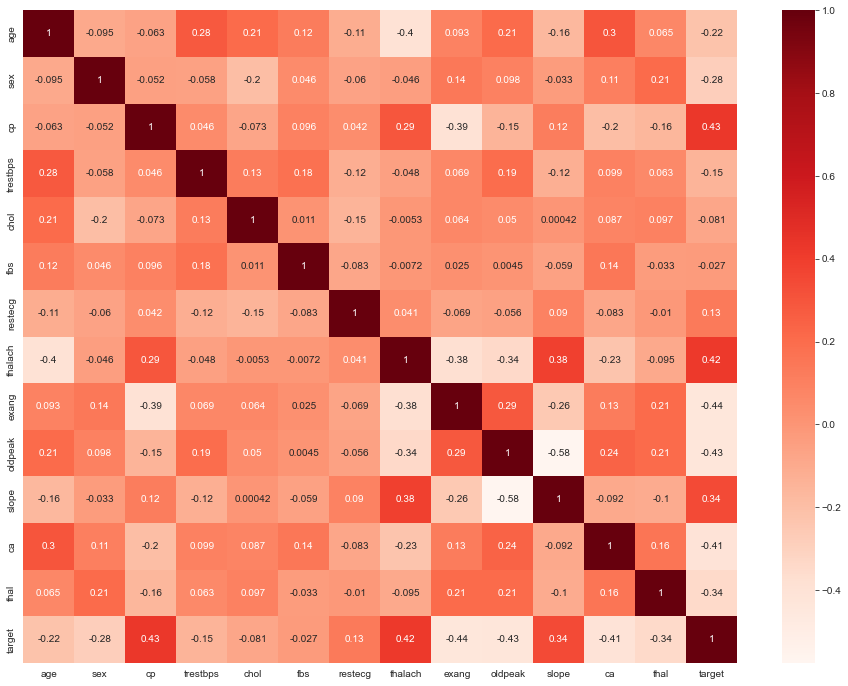

In [23]:
plt.figure(figsize= (16, 12))
sns.heatmap(hd.corr(), annot = True, cmap = 'Reds')

In [34]:
for c in hd.columns:
    print(f'{c}: {hd[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [35]:
num_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [36]:
cat_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [37]:
num_data

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

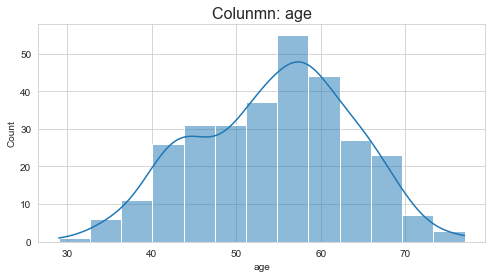

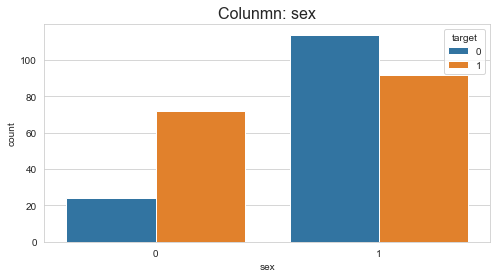

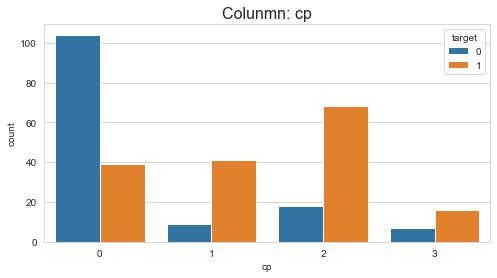

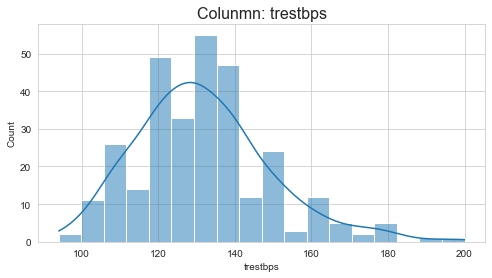

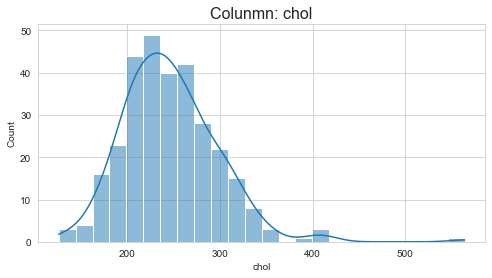

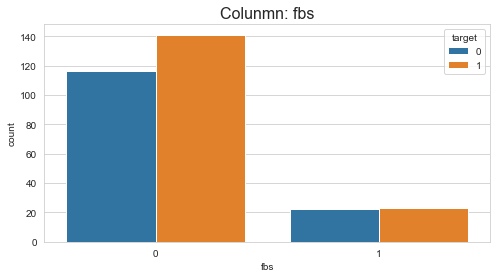

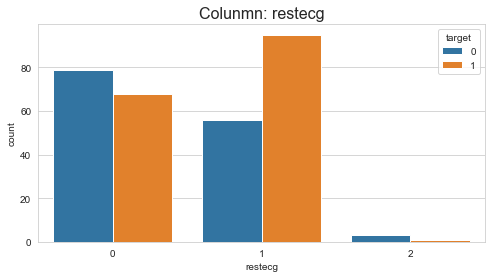

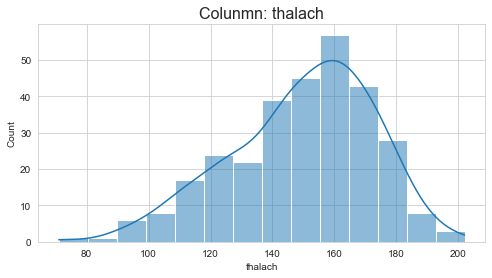

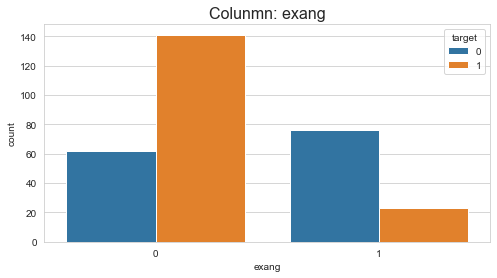

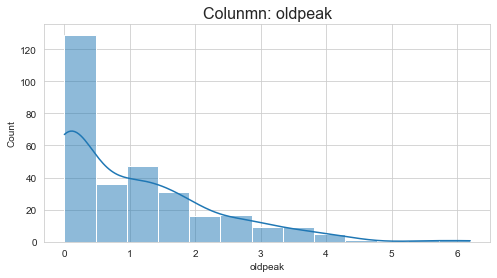

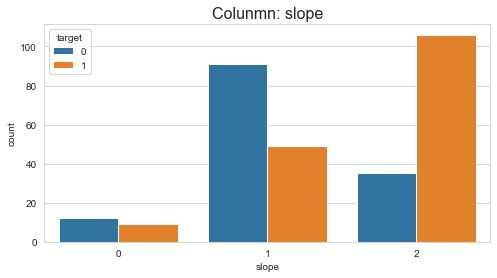

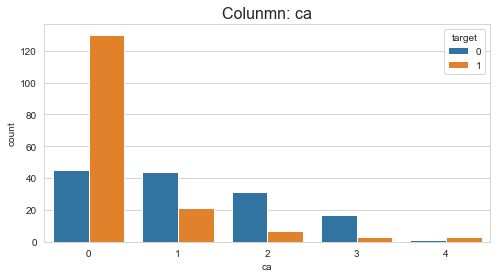

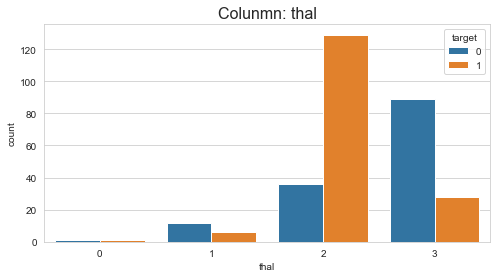

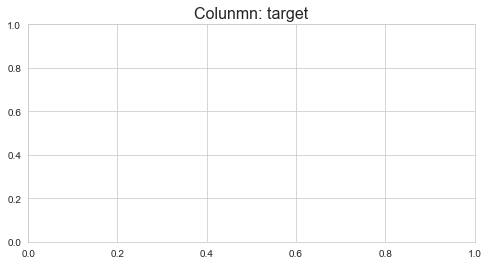

In [42]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f'Colunmn: {c}', fontsize = 16)
    if c in cat_data:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in num_data:
        sns.histplot(hd[c], kde = True)

# Removing outliers

<AxesSubplot:>

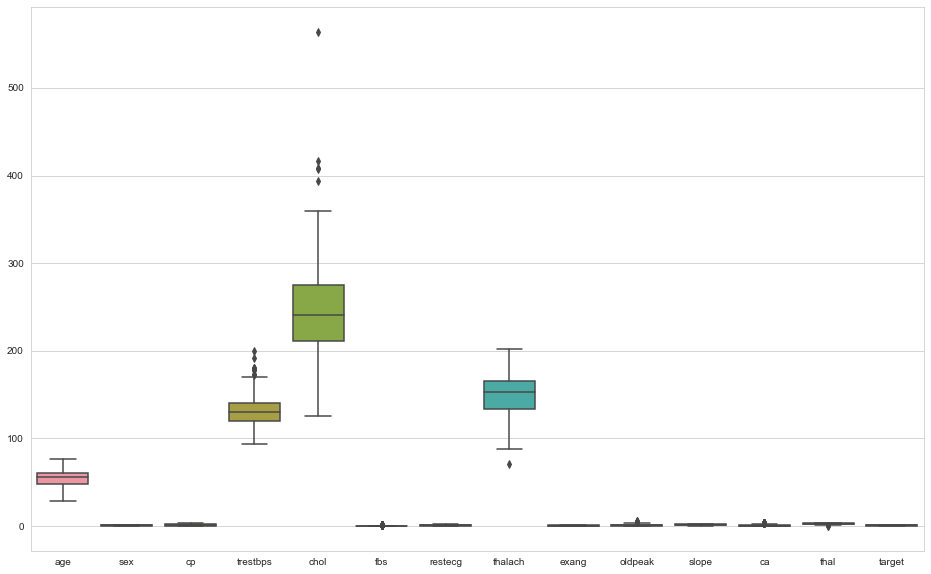

In [46]:
plt.figure(figsize = (16,10))
sns.boxplot(data = hd)

In [47]:
hd = hd.drop(hd[hd['chol'] > 380].index)
hd = hd.drop(hd[hd['trestbps'] > 180].index)
hd = hd.drop(hd[hd['thalach'] < 90].index)

<AxesSubplot:>

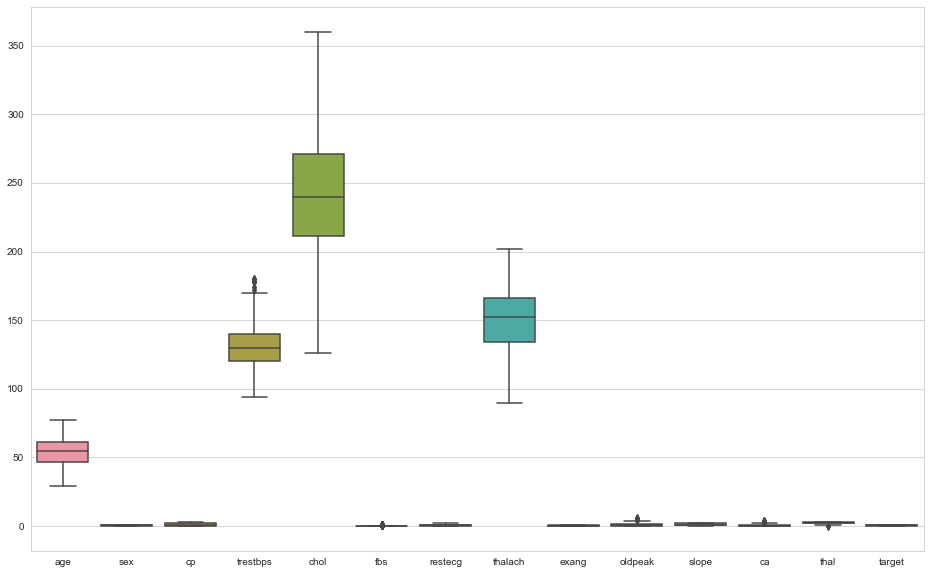

In [48]:
plt.figure(figsize = (16,10))
sns.boxplot(data = hd)

In [49]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.225256,0.692833,0.976109,131.061433,242.901024,0.146758,0.535836,149.846416,0.327645,1.021502,1.406143,0.706485,2.303754,0.549488
std,9.077130,0.462109,1.035058,16.872497,45.129575,0.354470,0.526274,22.309474,0.470158,1.150007,0.615632,1.004711,0.613674,0.498396
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
hd = pd.get_dummies(hd, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
hd

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [52]:
x = hd.drop('target', axis = 1)
y = hd['target']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
log = LogisticRegression(max_iter=1000)

In [59]:
log.fit(x_train, y_train)

C:\Users\augus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [60]:
log.score(x_train, y_train)

0.8760683760683761

In [61]:
log.score(x_test, y_test)

0.864406779661017

In [62]:
y_predict = log.predict(x_test)

In [66]:
accuracy_score(y_test, y_predict)

0.864406779661017

In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.89        34

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59



In [72]:
confusion_matrix(y_test, y_predict)

array([[20,  5],
       [ 3, 31]], dtype=int64)

In [79]:
def ml_report (df, algorithm, opt = 2):
    x = df.drop('target', axis = 1)
    y = df['target']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    if opt == 0:
        ml = algorithm(max_iter = 1000)
    elif opt == 1:
        ml = algorithm(n_estimators = 1000)
    elif opt == 2:
        ml = algorithm()
        
    ml.fit(x_train, y_train)
    score_train = ml.score(x_train, y_train)
    print(f'Train accuracy: {score_train * 100:2f}%')
    score_test = ml.score(x_test, y_test)
    print(f'Test accuracy: {score_test * 100:2f}%')
    
    y_predict = log.predict(x_test)
    print('---- CLASSIFICATION REPORT ----')
    print(classification_report(y_test, y_predict))
    print('---- CONFUSION MATRIX ----')
    confusion = confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot = True, cmap = 'Reds')
    
    return score_train, score_test

Train accuracy: 87.606838%
Test accuracy: 86.440678%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.89        34

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59

---- CONFUSION MATRIX ----


C:\Users\augus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


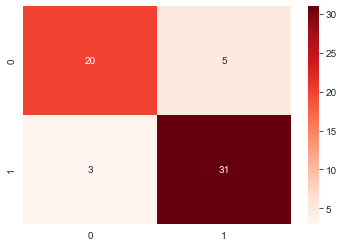

In [78]:
log_train, log_test = ml_report(hd, LogisticRegression, opt = 0)

Train accuracy: 100.000000%
Test accuracy: 76.271186%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.89        34

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59

---- CONFUSION MATRIX ----


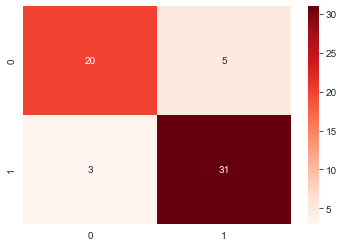

In [80]:
tree_train, tree_test = ml_report(hd, DecisionTreeClassifier)

Train accuracy: 75.641026%
Test accuracy: 71.186441%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.89        34

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59

---- CONFUSION MATRIX ----


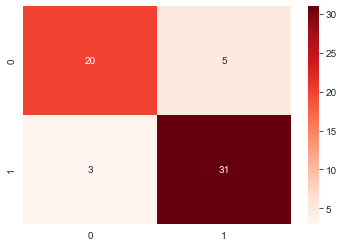

In [84]:
kn_train, kn_test = ml_report(hd, KNeighborsClassifier)

Train accuracy: 93.162393%
Test accuracy: 84.745763%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.89        34

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59

---- CONFUSION MATRIX ----


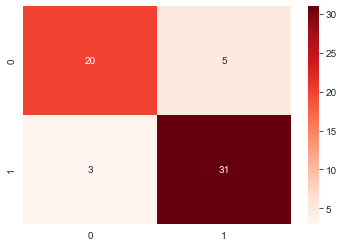

In [83]:
ada_train, ada_test = ml_report(hd, AdaBoostClassifier)

Train accuracy: 100.000000%
Test accuracy: 81.355932%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.89        34

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59

---- CONFUSION MATRIX ----


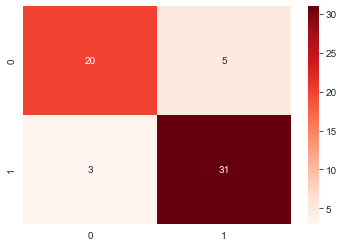

In [85]:
rand_train, rand_test = ml_report(hd, RandomForestClassifier)

In [87]:
def ml_report_scaler (df, algorithm, opt = 2):
    x = df.drop('target', axis = 1)
    y = df['target']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    col_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    x_train[col_scaler] = scaler.fit_transform(x_train[col_scaler])
    x_test[col_scaler] = scaler.transform(x_test[col_scaler])
    
    if opt == 0:
        ml = algorithm(max_iter = 1000)
    elif opt == 1:
        ml = algorithm(n_estimators = 1000)
    elif opt == 2:
        ml = algorithm()
        
    ml.fit(x_train, y_train)
    score_train = ml.score(x_train, y_train)
    print(f'Train accuracy: {score_train * 100:2f}%')
    score_test = ml.score(x_test, y_test)
    print(f'Test accuracy: {score_test * 100:2f}%')
    
    y_predict = log.predict(x_test)
    print('---- CLASSIFICATION REPORT ----')
    print(classification_report(y_test, y_predict))
    print('---- CONFUSION MATRIX ----')
    confusion = confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot = True, cmap = 'Reds')
    
    return score_train, score_test

Train accuracy: 87.179487%
Test accuracy: 86.440678%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.77      1.00      0.87        34

    accuracy                           0.83        59
   macro avg       0.89      0.80      0.81        59
weighted avg       0.87      0.83      0.82        59

---- CONFUSION MATRIX ----


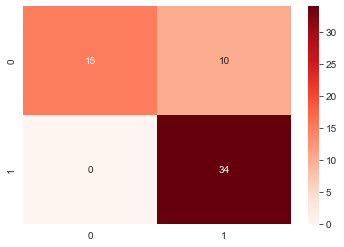

In [89]:
log_train_scaler, log_test_scaler = ml_report_scaler(hd, LogisticRegression, opt = 0)

Train accuracy: 100.000000%
Test accuracy: 79.661017%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.77      1.00      0.87        34

    accuracy                           0.83        59
   macro avg       0.89      0.80      0.81        59
weighted avg       0.87      0.83      0.82        59

---- CONFUSION MATRIX ----


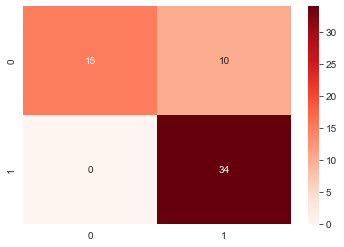

In [90]:
tree_train_scaler, tree_test_scaler = ml_report_scaler(hd, DecisionTreeClassifier)

Train accuracy: 87.179487%
Test accuracy: 88.135593%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.77      1.00      0.87        34

    accuracy                           0.83        59
   macro avg       0.89      0.80      0.81        59
weighted avg       0.87      0.83      0.82        59

---- CONFUSION MATRIX ----


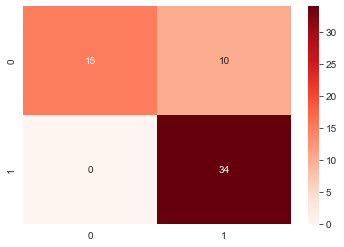

In [91]:
kn_train_scaler, kn_test_scaler = ml_report_scaler(hd, KNeighborsClassifier)

Train accuracy: 93.162393%
Test accuracy: 84.745763%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.77      1.00      0.87        34

    accuracy                           0.83        59
   macro avg       0.89      0.80      0.81        59
weighted avg       0.87      0.83      0.82        59

---- CONFUSION MATRIX ----


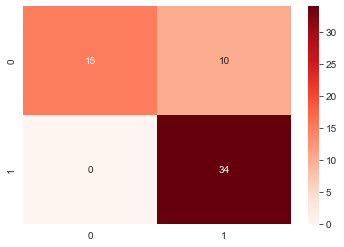

In [92]:
ada_train_scaler, ada_test_scaler = ml_report_scaler(hd, AdaBoostClassifier)

Train accuracy: 100.000000%
Test accuracy: 83.050847%
---- CLASSIFICATION REPORT ----
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.77      1.00      0.87        34

    accuracy                           0.83        59
   macro avg       0.89      0.80      0.81        59
weighted avg       0.87      0.83      0.82        59

---- CONFUSION MATRIX ----


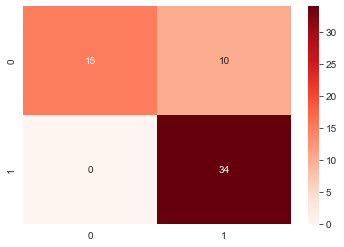

In [93]:
rand_train_scaler, rand_test_scaler = ml_report_scaler(hd, RandomForestClassifier)

In [101]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Ada Boost', 'Random Forest Classifier'],
       'Train Accuracy': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2), round(ada_train * 100, 2),
                         round(rand_train * 100, 2),],
       'Test Accuracy': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2), round(ada_test * 100, 2),
                         round(rand_test * 100, 2),],
       }

df = pd.DataFrame(data)
df.sort_values(by='Test Accuracy', ascending = False, inplace = True)
df

,Models,Train Accuracy,Test Accuracy
0,Logistic Regression,87.18,86.44
3,Ada Boost,93.16,84.75
4,Random Forest Classifier,100.00,81.36
1,Decision Tree,75.64,71.19
2,KNeighbors,75.64,71.19


In [103]:
data_scaler = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Ada Boost', 'Random Forest Classifier'],
       'Train Accuracy': [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), round(kn_train_scaler * 100, 2), 
                          round(ada_train_scaler * 100, 2), round(rand_train_scaler * 100, 2),],
       'Test Accuracy': [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), round(kn_test_scaler * 100, 2), 
                         round(ada_test_scaler * 100, 2), round(rand_test_scaler * 100, 2),],
       }

df = pd.DataFrame(data_scaler)
df.sort_values(by='Test Accuracy', ascending = False, inplace = True)
df

,Models,Train Accuracy,Test Accuracy
2,KNeighbors,87.18,88.14
0,Logistic Regression,87.18,86.44
3,Ada Boost,93.16,84.75
4,Random Forest Classifier,100.00,83.05
1,Decision Tree,100.00,79.66
